# LCFF snapshot
Cleaning datafile to be more python friendly

In [1]:
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)

In [2]:
df = pd.read_csv('../data/lcff_snapshot_2018-19/lcffsnapshot18an.csv',skiprows=8)

In [3]:
df.columns # we need to remove the spaces, rename for legibility, and drop unneeded columns

Index([' County Code ', 'District Code', 'School Code',
       'Local Educational Agency ', 'Charter Number',
       'TK/K-3 ADA\nTarget, B-5/B-1', '4 - 6 ADA\nTarget, B-6/B-2',
       '7 - 8 ADA\nTarget, B-7/B-3', '9 - 12 ADA\nTarget, B-8/B-4',
       'Unduplicated Pupil Percentage\nTarget, D-1',
       'Base Grant Funding\nTarget, C-5',
       'Supplemental Grant Funding\nTarget, D-7',
       'Concentration Grant Funding\nTarget, E-8',
       'Necessary Small Schools Allowance\nTarget, F-1',
       'Add-On (Based on 2012-13 Targeted Instructional Improvement Block Grant)\nTarget, F-2',
       'Add-On (Based on 2012-13 Home-to-School Transportation)\nTarget, F-3',
       'Add-On (Based on 2012-13 Small School District Bus Replacement Program)\nTarget, F-4',
       'Total LCFF Target Entitlement\nTarget, G-1/F-1',
       'Total LCFF Floor Entitlement\nTransition, B-13',
       'Current Year Gap Funding (100%)\nTransition, C-3',
       'Economic Recovery Target\nTransition, D-1',
      

In [4]:
df.columns = df.columns.str.replace(' ', '') # remove spaces in column names

In [5]:
df.head(10)

,CountyCode,DistrictCode,SchoolCode,LocalEducationalAgency,CharterNumber,"TK/K-3ADA\nTarget,B-5/B-1","4-6ADA\nTarget,B-6/B-2","7-8ADA\nTarget,B-7/B-3","9-12ADA\nTarget,B-8/B-4","UnduplicatedPupilPercentage\nTarget,D-1","BaseGrantFunding\nTarget,C-5","SupplementalGrantFunding\nTarget,D-7","ConcentrationGrantFunding\nTarget,E-8","NecessarySmallSchoolsAllowance\nTarget,F-1","Add-On(Basedon2012-13TargetedInstructionalImprovementBlockGrant)\nTarget,F-2","Add-On(Basedon2012-13Home-to-SchoolTransportation)\nTarget,F-3","Add-On(Basedon2012-13SmallSchoolDistrictBusReplacementProgram)\nTarget,F-4","TotalLCFFTargetEntitlement\nTarget,G-1/F-1","TotalLCFFFloorEntitlement\nTransition,B-13","CurrentYearGapFunding(100%)\nTransition,C-3","EconomicRecoveryTarget\nTransition,D-1","MiscellaneousAdjustments\nTransition,E-1","TotalLocalRevenueorIn-LieuofPropertyTaxes\nTransition,F-2/F-7","EducationProtectionAccountEntitlement\nTransition,F-5/F-9","NetStateAid\nTransition,F-6/F-10","AdditionalSAforMSAGuarantee\nTransition,H-1/H-2"
0,01,10017.0,112607.0,Envision Academy for Arts & Technology,811.0,-,-,-,359.23,0.7785,"$3,329,703","$518,435","$362,605",N/A,N/A,N/A,N/A,"$4,210,743","$3,871,076","$339,667",$-,$-,"$894,989","$683,070","$2,632,684",$-
1,01,10017.0,123968.0,Community School for Creative Education,1284.0,125.80,66.49,32.89,-,0.7936,"1,795,769","285,024","195,559",N/A,N/A,N/A,N/A,"2,276,352","2,124,388","151,964",-,-,"561,016","354,307","1,361,029",-
2,01,10017.0,124172.0,Yu Ming Charter,1296.0,252.38,134.11,48.83,-,0.1892,"3,474,375","131,471",-,N/A,N/A,N/A,N/A,"3,605,846","3,388,539","217,307",-,-,-,"683,750","2,922,096",-
3,01,10017.0,125567.0,Urban Montessori Charter,1383.0,271.70,101.50,26.45,-,0.3756,"3,212,111","241,293",-,N/A,N/A,N/A,N/A,"3,453,404","3,238,948","214,456",-,-,"995,692","627,724","1,829,988",-
4,01,10017.0,131581.0,Oakland Unity Middle School,1707.0,-,61.99,109.29,-,0.9199,"1,321,351","243,103","143,896",N/A,N/A,N/A,N/A,"1,708,350","1,620,979","87,371",-,-,"426,729","34,256","1,247,365",-
5,01,10017.0,136101.0,"Connecting Waters Charter School, East Bay",1881.0,119.54,102.23,61.30,63.04,0.1810,"2,820,608","102,106",-,N/A,N/A,N/A,N/A,"2,922,714","2,952,211",-,-,-,"1,010,170","69,222","1,843,322",-
6,01,10017.0,136226.0,Opportunity Academy,1888.0,-,-,-,70.57,0.5914,"654,113","77,368","13,540",N/A,N/A,N/A,N/A,"745,021","749,138",-,-,-,"180,018","14,114","550,889",-
7,01,10017.0,137448.0,Aurum Preparatory Academy,1908.0,-,85.38,-,-,0.8901,"646,412","115,074","70,394",N/A,N/A,N/A,N/A,"831,880","874,737",-,-,-,"212,717","17,076","602,087",-
8,01,10017.0,6001788.0,Cox Academy,740.0,386.97,188.34,-,-,0.9448,"4,612,620","871,600","502,314",N/A,N/A,N/A,N/A,"5,986,534","5,603,859","382,675",-,-,"1,433,333","908,013","3,645,188",-
9,01,10017.0,6002000.0,Lazear Charter Academy,1464.0,198.66,155.95,93.66,-,0.9317,"3,546,835","660,917","386,251",N/A,N/A,N/A,N/A,"4,594,003","4,293,825","300,178",-,-,"1,116,824","709,346","2,767,833",-


In [6]:
df.tail(7)

,CountyCode,DistrictCode,SchoolCode,LocalEducationalAgency,CharterNumber,"TK/K-3ADA\nTarget,B-5/B-1","4-6ADA\nTarget,B-6/B-2","7-8ADA\nTarget,B-7/B-3","9-12ADA\nTarget,B-8/B-4","UnduplicatedPupilPercentage\nTarget,D-1","BaseGrantFunding\nTarget,C-5","SupplementalGrantFunding\nTarget,D-7","ConcentrationGrantFunding\nTarget,E-8","NecessarySmallSchoolsAllowance\nTarget,F-1","Add-On(Basedon2012-13TargetedInstructionalImprovementBlockGrant)\nTarget,F-2","Add-On(Basedon2012-13Home-to-SchoolTransportation)\nTarget,F-3","Add-On(Basedon2012-13SmallSchoolDistrictBusReplacementProgram)\nTarget,F-4","TotalLCFFTargetEntitlement\nTarget,G-1/F-1","TotalLCFFFloorEntitlement\nTransition,B-13","CurrentYearGapFunding(100%)\nTransition,C-3","EconomicRecoveryTarget\nTransition,D-1","MiscellaneousAdjustments\nTransition,E-1","TotalLocalRevenueorIn-LieuofPropertyTaxes\nTransition,F-2/F-7","EducationProtectionAccountEntitlement\nTransition,F-5/F-9","NetStateAid\nTransition,F-6/F-10","AdditionalSAforMSAGuarantee\nTransition,H-1/H-2"
2241,58,72769.0,0.0,Wheatland Union High,NaN,-,-,-,761.94,0.4283,"7,062,422","604,967",-,-,-,"185,239",-,"7,852,628","7,260,075","592,553",-,-,"2,191,152","1,422,027","4,239,449",-
2242,STATE TOTALS,NaN,NaN,NaN,NaN,"1,813,000.84","1,361,446.53","923,799.16","1,855,585.57",NaN,"$49,569,226,529","$6,189,112,345","$3,473,165,908","$100,474,970","$855,045,830","$461,199,504","$4,112,421","$60,652,337,507","$56,805,139,260","$3,934,385,946","$45,891,349","$(134,316)","$20,313,234,098","$7,649,112,824","$33,596,775,929","$144,408,593"
2243,NOTE: Some LEAs may not display funding data d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2244,Prepared by:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2245,California Department of Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2246,School Fiscal Services Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2247,February 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Trim the tail, save state totals

In [7]:
totals = df.loc[df['CountyCode'] == 'STATE TOTALS']

In [8]:
totals

,CountyCode,DistrictCode,SchoolCode,LocalEducationalAgency,CharterNumber,"TK/K-3ADA\nTarget,B-5/B-1","4-6ADA\nTarget,B-6/B-2","7-8ADA\nTarget,B-7/B-3","9-12ADA\nTarget,B-8/B-4","UnduplicatedPupilPercentage\nTarget,D-1","BaseGrantFunding\nTarget,C-5","SupplementalGrantFunding\nTarget,D-7","ConcentrationGrantFunding\nTarget,E-8","NecessarySmallSchoolsAllowance\nTarget,F-1","Add-On(Basedon2012-13TargetedInstructionalImprovementBlockGrant)\nTarget,F-2","Add-On(Basedon2012-13Home-to-SchoolTransportation)\nTarget,F-3","Add-On(Basedon2012-13SmallSchoolDistrictBusReplacementProgram)\nTarget,F-4","TotalLCFFTargetEntitlement\nTarget,G-1/F-1","TotalLCFFFloorEntitlement\nTransition,B-13","CurrentYearGapFunding(100%)\nTransition,C-3","EconomicRecoveryTarget\nTransition,D-1","MiscellaneousAdjustments\nTransition,E-1","TotalLocalRevenueorIn-LieuofPropertyTaxes\nTransition,F-2/F-7","EducationProtectionAccountEntitlement\nTransition,F-5/F-9","NetStateAid\nTransition,F-6/F-10","AdditionalSAforMSAGuarantee\nTransition,H-1/H-2"
2242,STATE TOTALS,NaN,NaN,NaN,NaN,"1,813,000.84","1,361,446.53","923,799.16","1,855,585.57",NaN,"$49,569,226,529","$6,189,112,345","$3,473,165,908","$100,474,970","$855,045,830","$461,199,504","$4,112,421","$60,652,337,507","$56,805,139,260","$3,934,385,946","$45,891,349","$(134,316)","$20,313,234,098","$7,649,112,824","$33,596,775,929","$144,408,593"


In [9]:
df.drop(df.tail(6).index,inplace=True)

## What do these columns mean?

In [10]:
df.columns[0:3]

Index(['CountyCode', 'DistrictCode', 'SchoolCode'], dtype='object')

These are the codes that create the CDS code, which can be used to place the LEA with other datasets

In [11]:
df.columns[3]

'LocalEducationalAgency'

Name of the district/charter

In [12]:
df.columns[4]

'CharterNumber'

In [13]:
df.columns[5:9]

Index(['TK/K-3ADA\nTarget,B-5/B-1', '4-6ADA\nTarget,B-6/B-2',
       '7-8ADA\nTarget,B-7/B-3', '9-12ADA\nTarget,B-8/B-4'],
      dtype='object')

Average daily attendance targets. These might be useful for another analysis, but we will drop them. 

In [14]:
df.columns[9]

'UnduplicatedPupilPercentage\nTarget,D-1'

ratio of students classified as in need of extra funding

In [15]:
df.columns[10:13]

Index(['BaseGrantFunding\nTarget,C-5', 'SupplementalGrantFunding\nTarget,D-7',
       'ConcentrationGrantFunding\nTarget,E-8'],
      dtype='object')

These are the three major grants we use in our analysis

In [16]:
df.columns[13:]

Index(['NecessarySmallSchoolsAllowance\nTarget,F-1',
       'Add-On(Basedon2012-13TargetedInstructionalImprovementBlockGrant)\nTarget,F-2',
       'Add-On(Basedon2012-13Home-to-SchoolTransportation)\nTarget,F-3',
       'Add-On(Basedon2012-13SmallSchoolDistrictBusReplacementProgram)\nTarget,F-4',
       'TotalLCFFTargetEntitlement\nTarget,G-1/F-1',
       'TotalLCFFFloorEntitlement\nTransition,B-13',
       'CurrentYearGapFunding(100%)\nTransition,C-3',
       'EconomicRecoveryTarget\nTransition,D-1',
       'MiscellaneousAdjustments\nTransition,E-1',
       'TotalLocalRevenueorIn-LieuofPropertyTaxes\nTransition,F-2/F-7',
       'EducationProtectionAccountEntitlement\nTransition,F-5/F-9',
       'NetStateAid\nTransition,F-6/F-10',
       'AdditionalSAforMSAGuarantee\nTransition,H-1/H-2'],
      dtype='object')

The rest of these (save a few to be highlighted) are kinds of transitionary funding streams that are supposed to be minimized as the LCFF becomes fully funded for the 2018-2019 schoool year. We will sum these into a single column to represent any funding that the LEA's recieved from outside the three major grants. 

In [17]:
df.columns[17:20]

Index(['TotalLCFFTargetEntitlement\nTarget,G-1/F-1',
       'TotalLCFFFloorEntitlement\nTransition,B-13',
       'CurrentYearGapFunding(100%)\nTransition,C-3'],
      dtype='object')

These are targets and indicators, we wont include them in our new summed column.

In [18]:
df.columns[21]

'MiscellaneousAdjustments\nTransition,E-1'

These miscellaneous adjustments can be negative in the case that an LEA was paid over their targets in the previous year and must repay the state.

## select desired columns, clean data

gonna get ugly

In [19]:
df['NecessarySmallSchoolsAllowance\nTarget,F-1'] = df['NecessarySmallSchoolsAllowance\nTarget,F-1'].str.replace('$', '').str.strip()
df['NecessarySmallSchoolsAllowance\nTarget,F-1'] = df['NecessarySmallSchoolsAllowance\nTarget,F-1'].str.replace(',', '')
df['NecessarySmallSchoolsAllowance\nTarget,F-1'] = df['NecessarySmallSchoolsAllowance\nTarget,F-1'].str.replace('N/A', '0')
df['Add-On(Basedon2012-13TargetedInstructionalImprovementBlockGrant)\nTarget,F-2'] = df['Add-On(Basedon2012-13TargetedInstructionalImprovementBlockGrant)\nTarget,F-2'].str.replace('$', '').str.strip()
df['Add-On(Basedon2012-13TargetedInstructionalImprovementBlockGrant)\nTarget,F-2'] = df['Add-On(Basedon2012-13TargetedInstructionalImprovementBlockGrant)\nTarget,F-2'].str.replace(',', '')
df['Add-On(Basedon2012-13TargetedInstructionalImprovementBlockGrant)\nTarget,F-2'] = df['Add-On(Basedon2012-13TargetedInstructionalImprovementBlockGrant)\nTarget,F-2'].str.replace('N/A', '0')
df['Add-On(Basedon2012-13Home-to-SchoolTransportation)\nTarget,F-3'] = df['Add-On(Basedon2012-13Home-to-SchoolTransportation)\nTarget,F-3'].str.replace('$', '').str.strip()
df['Add-On(Basedon2012-13Home-to-SchoolTransportation)\nTarget,F-3'] = df['Add-On(Basedon2012-13Home-to-SchoolTransportation)\nTarget,F-3'].str.replace(',', '')
df['Add-On(Basedon2012-13Home-to-SchoolTransportation)\nTarget,F-3'] = df['Add-On(Basedon2012-13Home-to-SchoolTransportation)\nTarget,F-3'].str.replace('N/A', '0')
df['Add-On(Basedon2012-13SmallSchoolDistrictBusReplacementProgram)\nTarget,F-4'] = df['Add-On(Basedon2012-13SmallSchoolDistrictBusReplacementProgram)\nTarget,F-4'].str.replace('$', '').str.strip()
df['Add-On(Basedon2012-13SmallSchoolDistrictBusReplacementProgram)\nTarget,F-4'] = df['Add-On(Basedon2012-13SmallSchoolDistrictBusReplacementProgram)\nTarget,F-4'].str.replace(',', '')
df['Add-On(Basedon2012-13SmallSchoolDistrictBusReplacementProgram)\nTarget,F-4'] = df['Add-On(Basedon2012-13SmallSchoolDistrictBusReplacementProgram)\nTarget,F-4'].str.replace('N/A', '0')
df['EconomicRecoveryTarget\nTransition,D-1'] = df['EconomicRecoveryTarget\nTransition,D-1'].str.replace('$', '').str.strip()
df['EconomicRecoveryTarget\nTransition,D-1'] = df['EconomicRecoveryTarget\nTransition,D-1'].str.replace(',', '')
df['EconomicRecoveryTarget\nTransition,D-1'] = df['EconomicRecoveryTarget\nTransition,D-1'].str.replace('N/A', '0')
df['MiscellaneousAdjustments\nTransition,E-1'] = df['MiscellaneousAdjustments\nTransition,E-1'].str.replace('$', '').str.strip()
df['MiscellaneousAdjustments\nTransition,E-1'] = df['MiscellaneousAdjustments\nTransition,E-1'].str.replace(',', '')
df['MiscellaneousAdjustments\nTransition,E-1'] = df['MiscellaneousAdjustments\nTransition,E-1'].str.replace('N/A', '0')
df['TotalLocalRevenueorIn-LieuofPropertyTaxes\nTransition,F-2/F-7'] = df['TotalLocalRevenueorIn-LieuofPropertyTaxes\nTransition,F-2/F-7'].str.replace('$', '').str.strip()
df['TotalLocalRevenueorIn-LieuofPropertyTaxes\nTransition,F-2/F-7'] = df['TotalLocalRevenueorIn-LieuofPropertyTaxes\nTransition,F-2/F-7'].str.replace(',', '')
df['TotalLocalRevenueorIn-LieuofPropertyTaxes\nTransition,F-2/F-7'] = df['TotalLocalRevenueorIn-LieuofPropertyTaxes\nTransition,F-2/F-7'].str.replace('N/A', '0')
df['EducationProtectionAccountEntitlement\nTransition,F-5/F-9'] = df['EducationProtectionAccountEntitlement\nTransition,F-5/F-9'].str.replace('$', '').str.strip()
df['EducationProtectionAccountEntitlement\nTransition,F-5/F-9'] = df['EducationProtectionAccountEntitlement\nTransition,F-5/F-9'].str.replace(',', '')
df['EducationProtectionAccountEntitlement\nTransition,F-5/F-9'] = df['EducationProtectionAccountEntitlement\nTransition,F-5/F-9'].str.replace('N/A', '0')
df['AdditionalSAforMSAGuarantee\nTransition,H-1/H-2'] = df['AdditionalSAforMSAGuarantee\nTransition,H-1/H-2'].str.replace('$', '').str.strip()
df['AdditionalSAforMSAGuarantee\nTransition,H-1/H-2'] = df['AdditionalSAforMSAGuarantee\nTransition,H-1/H-2'].str.replace(',', '')
df['AdditionalSAforMSAGuarantee\nTransition,H-1/H-2'] = df['AdditionalSAforMSAGuarantee\nTransition,H-1/H-2'].str.replace('N/A', '0')

<ipython-input-19-277d3e7336a6>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['NecessarySmallSchoolsAllowance\nTarget,F-1'] = df['NecessarySmallSchoolsAllowance\nTarget,F-1'].str.replace('$', '').str.strip()
<ipython-input-19-277d3e7336a6>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Add-On(Basedon2012-13TargetedInstructionalImprovementBlockGrant)\nTarget,F-2'] = df['Add-On(Basedon2012-13TargetedInstructionalImprovementBlockGrant)\nTarget,F-2'].str.replace('$', '').str.strip()
<ipython-input-19-277d3e7336a6>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* b

In [20]:
df.replace({'NecessarySmallSchoolsAllowance\nTarget,F-1' : {'-': '0'}}, inplace=True)
df.replace({'Add-On(Basedon2012-13TargetedInstructionalImprovementBlockGrant)\nTarget,F-2' : {'-': '0'}}, inplace=True)
df.replace({'Add-On(Basedon2012-13Home-to-SchoolTransportation)\nTarget,F-3' : {'-': '0'}}, inplace=True)
df.replace({'Add-On(Basedon2012-13SmallSchoolDistrictBusReplacementProgram)\nTarget,F-4' : {'-': '0'}}, inplace=True)
df.replace({'EconomicRecoveryTarget\nTransition,D-1' : {'-': '0'}}, inplace=True)
df.replace({'MiscellaneousAdjustments\nTransition,E-1' : {'-': '0'}}, inplace=True)
df.replace({'TotalLocalRevenueorIn-LieuofPropertyTaxes\nTransition,F-2/F-7' : {'-': '0'}}, inplace=True)
df.replace({'EducationProtectionAccountEntitlement\nTransition,F-5/F-9' : {'-': '0'}}, inplace=True)
df.replace({'AdditionalSAforMSAGuarantee\nTransition,H-1/H-2' : {'-': '0'}}, inplace=True)
df['MiscellaneousAdjustments\nTransition,E-1'] = df.replace({'MiscellaneousAdjustments\nTransition,E-1': {'[)]': ''}}, regex=True) # dealing with negative values (adjustments)

In [21]:
df['NecessarySmallSchoolsAllowance\nTarget,F-1'] = df['NecessarySmallSchoolsAllowance\nTarget,F-1'].astype(float).astype(int)
df['Add-On(Basedon2012-13TargetedInstructionalImprovementBlockGrant)\nTarget,F-2'] = df['Add-On(Basedon2012-13TargetedInstructionalImprovementBlockGrant)\nTarget,F-2'].astype(float).astype(int)
df['Add-On(Basedon2012-13Home-to-SchoolTransportation)\nTarget,F-3'] = df['Add-On(Basedon2012-13Home-to-SchoolTransportation)\nTarget,F-3'].astype(float).astype(int)
df['Add-On(Basedon2012-13SmallSchoolDistrictBusReplacementProgram)\nTarget,F-4'] = df['Add-On(Basedon2012-13SmallSchoolDistrictBusReplacementProgram)\nTarget,F-4'].astype(float).astype(int)
df['EconomicRecoveryTarget\nTransition,D-1'] = df['EconomicRecoveryTarget\nTransition,D-1'].astype(float).astype(int)
df['MiscellaneousAdjustments\nTransition,E-1'] = df['MiscellaneousAdjustments\nTransition,E-1'].replace('[(]','-', regex=True).astype(float).astype(int)
df['TotalLocalRevenueorIn-LieuofPropertyTaxes\nTransition,F-2/F-7'] = df['TotalLocalRevenueorIn-LieuofPropertyTaxes\nTransition,F-2/F-7'].astype(float).astype(int)
df['EducationProtectionAccountEntitlement\nTransition,F-5/F-9'] = df['EducationProtectionAccountEntitlement\nTransition,F-5/F-9'].astype(float).astype(int)
df['AdditionalSAforMSAGuarantee\nTransition,H-1/H-2'] = df['AdditionalSAforMSAGuarantee\nTransition,H-1/H-2'].astype(float).astype(int)

In [22]:
lcff = df[['CountyCode', 
           'DistrictCode', 
           'SchoolCode', 
           'LocalEducationalAgency', 
           'UnduplicatedPupilPercentage\nTarget,D-1', 
           'BaseGrantFunding\nTarget,C-5', 
           'SupplementalGrantFunding\nTarget,D-7', 
           'ConcentrationGrantFunding\nTarget,E-8']]

In [23]:
lcff = lcff.rename(columns={'CountyCode':'county_fips',
                            'DistrictCode':'district_code',
                            'SchoolCode':'school_code',
                            'LocalEducationalAgency':'name',
                            'UnduplicatedPupilPercentage\nTarget,D-1':'unduplicated_pupil_ratio',
                            'BaseGrantFunding\nTarget,C-5':'base_grant',
                            'SupplementalGrantFunding\nTarget,D-7':'supplemental_grant',
                            'ConcentrationGrantFunding\nTarget,E-8':'concentration_grant'})

In [24]:
lcff['district_code'] = lcff['district_code'].astype(float).astype(int).astype(str)
lcff['school_code'] = lcff['school_code'].astype(float).astype(int).astype(str)

In [25]:
lcff.base_grant = lcff.base_grant.str.replace('$', '').str.strip()
lcff.base_grant = lcff.base_grant.str.replace(',', '')
lcff.supplemental_grant = lcff.supplemental_grant.str.replace('$', '').str.strip()
lcff.supplemental_grant = lcff.supplemental_grant.str.replace(',', '')
lcff.concentration_grant = lcff.concentration_grant.str.replace('$', '').str.strip()
lcff.concentration_grant = lcff.concentration_grant.str.replace(',', '')
lcff.unduplicated_pupil_ratio = lcff.unduplicated_pupil_ratio.str.replace('-', '-1').str.strip()

<ipython-input-25-b19f37c04c2c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  lcff.base_grant = lcff.base_grant.str.replace('$', '').str.strip()
<ipython-input-25-b19f37c04c2c>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  lcff.supplemental_grant = lcff.supplemental_grant.str.replace('$', '').str.strip()
<ipython-input-25-b19f37c04c2c>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  lcff.concentration_grant = lcff.concentration_grant.str.replace('$', '').str.strip()


In [26]:
lcff.replace({'base_grant' : {'-': '0'}}, inplace=True)
lcff.replace({'supplemental_grant' : {'-': '0'}},inplace=True)
lcff.replace({'concentration_grant' : {'-': '0'}}, inplace=True)

In [27]:
lcff.base_grant = lcff.base_grant.astype(float).astype(int)
lcff.supplemental_grant = lcff.supplemental_grant.astype(float).astype(int)
lcff.concentration_grant = lcff.concentration_grant.astype(float).astype(int)

In [28]:
sum_cols = ['base_grant', 
            'supplemental_grant', 
            'concentration_grant']

trans_cols =['NecessarySmallSchoolsAllowance\nTarget,F-1',
            'Add-On(Basedon2012-13TargetedInstructionalImprovementBlockGrant)\nTarget,F-2',
            'Add-On(Basedon2012-13Home-to-SchoolTransportation)\nTarget,F-3',
            'Add-On(Basedon2012-13SmallSchoolDistrictBusReplacementProgram)\nTarget,F-4',
            'EconomicRecoveryTarget\nTransition,D-1',
            'MiscellaneousAdjustments\nTransition,E-1',
            'TotalLocalRevenueorIn-LieuofPropertyTaxes\nTransition,F-2/F-7',
            'EducationProtectionAccountEntitlement\nTransition,F-5/F-9',
            'AdditionalSAforMSAGuarantee\nTransition,H-1/H-2']

lcff['grant_totals'] = lcff[sum_cols].sum(axis=1)
lcff['other_totals'] = df[trans_cols].sum(axis=1)

In [29]:
lcff.unduplicated_pupil_ratio = lcff.unduplicated_pupil_ratio.astype(str)
lcff.unduplicated_pupil_ratio = lcff.unduplicated_pupil_ratio.astype(float).round(2) # move decimal over

In [30]:
lcff.head()

,county_fips,district_code,school_code,name,unduplicated_pupil_ratio,base_grant,supplemental_grant,concentration_grant,grant_totals,other_totals
0,01,10017,112607,Envision Academy for Arts & Technology,0.78,3329703,518435,362605,4210743,1578060
1,01,10017,123968,Community School for Creative Education,0.79,1795769,285024,195559,2276352,915324
2,01,10017,124172,Yu Ming Charter,0.19,3474375,131471,0,3605846,683751
3,01,10017,125567,Urban Montessori Charter,0.38,3212111,241293,0,3453404,1623417
4,01,10017,131581,Oakland Unity Middle School,0.92,1321351,243103,143896,1708350,460986


In [31]:
districts = lcff.loc[lcff['school_code'] == '0']

These are school districts funded by lcff 

In [32]:
districts.shape

(944, 10)

Now we get the shapes

[cde arcgis home page](https://data-cdegis.opendata.arcgis.com/)

[specific district shapefile (2018-19](https://data-cdegis.opendata.arcgis.com/datasets/california-school-district-areas-2018-19/explore?location=37.190041%2C-119.002219%2C7.67)

In [33]:
shapes = gpd.read_file('../data/California_School_District_Areas_2018-19.geojson')

In [34]:
shapes.columns

Index(['OBJECTID', 'Year', 'FedID', 'CDCode', 'CDSCode', 'CountyName',
       'DistrictName', 'DistrictType', 'GradeLow', 'GradeHigh',
       'GradeLowCensus', 'GradeHighCensus', 'AssistStatus', 'CongressUS',
       'SenateCA', 'AssemblyCA', 'LocaleDistrict', 'UpdateNotes',
       'EnrollTotal', 'EnrollCharter', 'EnrollNonCharter', 'AAcount', 'AApct',
       'AIcount', 'AIpct', 'AScount', 'ASpct', 'FIcount', 'FIpct', 'HIcount',
       'HIpct', 'MRcount', 'MRpct', 'PIcount', 'PIpct', 'WHcount', 'WHpct',
       'NRcount', 'NRpct', 'ELcount', 'ELpct', 'FOScount', 'FOSpct',
       'HOMcount', 'HOMpct', 'MIGcount', 'MIGpct', 'SWDcount', 'SWDpct',
       'SEDcount', 'SEDpct', 'UPcount', 'UPpct', 'ELATested', 'ELAStdMetPct',
       'MathTested', 'MathStdMetPct', 'CCPrepCohortCount', 'CCPrepPct',
       'AbsentEligCount', 'AbsentPct', 'GradCohortCount', 'GradPct',
       'UCCSUReqMetPct', 'DropOutPct', 'EnrollCumulative', 'SuspPct',
       'SHAPE_Length', 'SHAPE_Area', 'geometry'],
      dtype

In [35]:
shapes = shapes[['CDCode', 'geometry']]
districts['CDCode'] = districts.county_fips + districts.district_code

<ipython-input-35-150dc0a334d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  districts['CDCode'] = districts.county_fips + districts.district_code


In [36]:
merged = districts.merge(shapes, on='CDCode')
districts = gpd.GeoDataFrame(merged)

<AxesSubplot:>

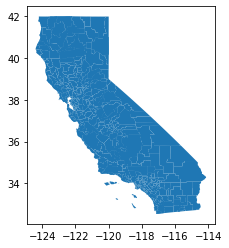

In [44]:
districts.plot()

In [43]:
districts.head()

,county_fips,district_code,school_code,name,unduplicated_pupil_ratio,base_grant,supplemental_grant,concentration_grant,grant_totals,other_totals,CDCode,geometry
0,01,61119,0,Alameda Unified,0.35,75938983,5294466,0,81233449,44974892,0161119,"MULTIPOLYGON (((-122.22677 37.72651, -122.2267..."
1,01,61127,0,Albany City Unified,0.28,29644972,1679684,0,31324656,16810202,0161127,"MULTIPOLYGON (((-122.28666 37.89880, -122.2867..."
2,01,61143,0,Berkeley Unified,0.35,78556532,5528808,0,84085340,58405572,0161143,"MULTIPOLYGON (((-122.25605 37.89834, -122.2560..."
3,01,61150,0,Castro Valley Unified,0.29,74911585,4350864,0,79262449,41524914,0161150,"MULTIPOLYGON (((-122.00503 37.63628, -122.0050..."
4,01,61168,0,Emery Unified,0.80,5702229,906997,699378,7308604,5846553,0161168,"MULTIPOLYGON (((-122.29696 37.83153, -122.2969..."


In [39]:
districts.to_parquet('../data/lcff_snapshot_2018-19/trad_districts.parquet')

<ipython-input-39-af9c290c2a23>:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  districts.to_parquet('../data/lcff_snapshot_2018-19/trad_districts.parquet')


In [40]:
schools = lcff.loc[lcff['school_code'] != '0']

In [41]:
schools.shape

(1298, 10)

These are charter schools/non-traditional LEA's that recieve lcff funding

In [42]:
schools.to_parquet('../data/lcff_snapshot_2018-19/nontrad.parquet')